# 5. K-means clustering

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("../data/KMeansData.csv")
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
# K-means는 비지도 학습이기 때문에 종속 변수가 없음
# y가 따로 필요 없음
X = dataset.iloc[:, :].values
# X = dataset.values
# X = dataset.to_numpy() # 공식 홈페이지 권장 방식
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

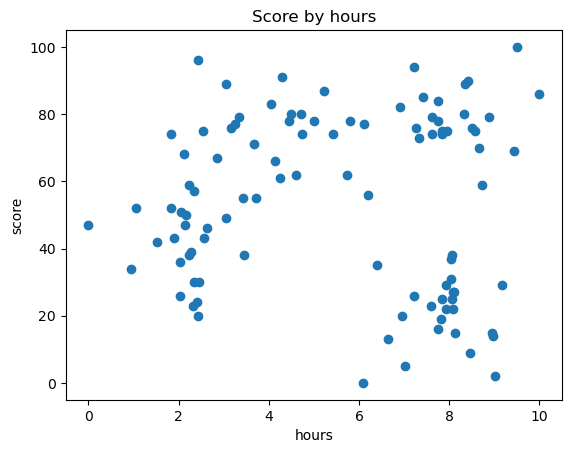

In [5]:
plt.title("Score by hours")
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (축 범위 통일)

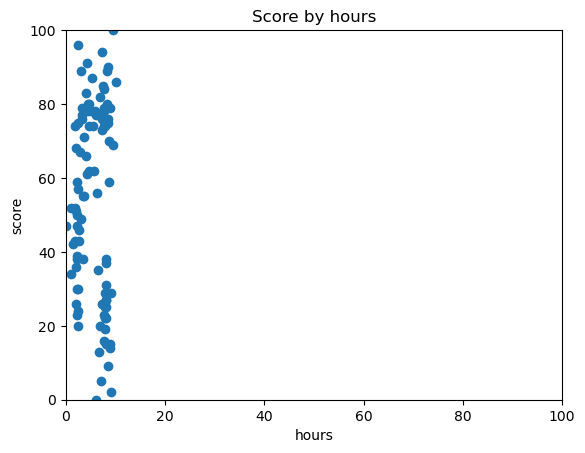

In [6]:
plt.title("Score by hours")
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.xlabel("hours")
plt.xlim(0, 100)
plt.ylabel("score")
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링 된 데이터)

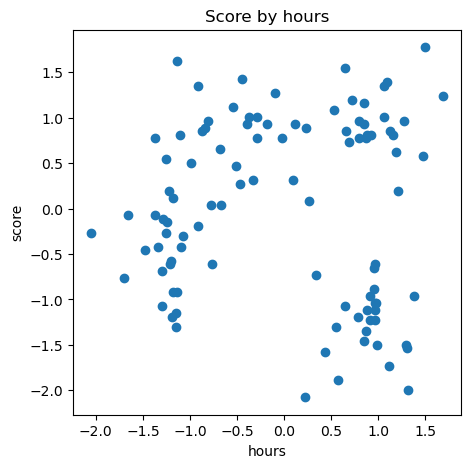

In [8]:
plt.figure(figsize = (5, 5))
plt.title("Score by hours")
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 최적의 K 값 찾기 (Elbow Method)

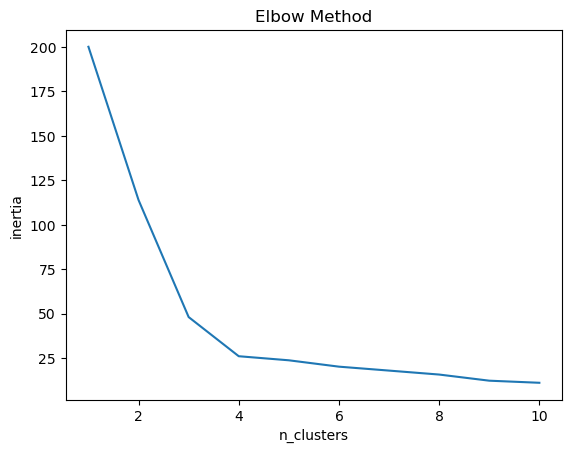

In [9]:
from sklearn.cluster import KMeans
inertia_list = []

for i in range(1, 11) :
    kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = "auto", random_state = 0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid)까지 거리의 제곱의 합

plt.title("Elbow Method")
plt.plot(range(1, 11), inertia_list)
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.show()

### 최적의 K값으로 (4) K-means 학습

In [10]:
K = 4 # 최적의 K 값
kmeans = KMeans(n_clusters = K, n_init = "auto", random_state = 0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 3, 0, 3, 3, 2, 2, 3, 1, 3, 3, 0, 2, 0, 0, 3, 2, 1, 0, 3, 2, 3,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 3, 1, 1, 0, 3, 3, 3, 0, 2, 1, 0,
       0, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 3, 3, 3, 0, 2, 2, 1, 1, 1, 1, 2,
       2, 3, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 2, 1, 2, 2, 1, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 0, 1, 1, 3, 2, 0])

### 데이터 시각화 (최적의 K)

In [11]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid 좌표)
centers

array([[-1.24939347, -0.48807293],
       [ 0.94107583,  0.93569782],
       [ 0.8837666 , -1.26929779],
       [-0.57544896,  0.82167289]])

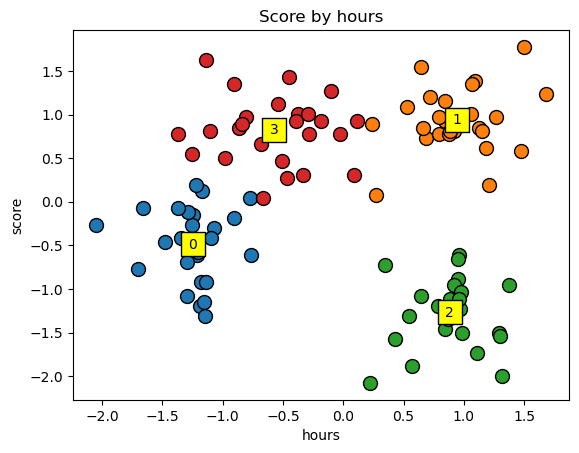

In [12]:
for cluster in range(K) :
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, edgecolors = "black") # 각 데이터
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolors = "black", color = "yellow", marker = "s") # cluster 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = "center", ha = "center") # cluster 텍스트 출력

plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (스케일링 원복)

In [13]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [14]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 2.1528, 41.24  ],
       [ 8.0084, 78.2   ],
       [ 7.8552, 20.96  ],
       [ 3.9544, 75.24  ]])

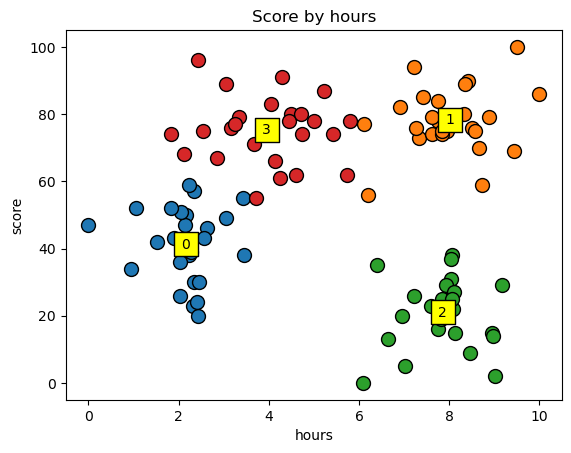

In [15]:
for cluster in range(K) :
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s = 100, edgecolors = "black") # 각 데이터
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolors = "black", color = "yellow", marker = "s") # cluster 중심점 네모
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = "center", ha = "center") # cluster 텍스트 출력

plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()